In [42]:
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


#Loading Data

In [7]:
breast_cancer=sklearn.datasets.load_breast_cancer()
x=breast_cancer.data
y=breast_cancer.target
data=pd.DataFrame(x,columns=breast_cancer.feature_names)
data["class"]=breast_cancer.target

#Data Splitting for training and testing

In [11]:
from sklearn.model_selection import train_test_split
X=data.drop("class",axis=1)
Y=data["class"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
X_train = X_train.values
X_test = X_test.values

#Perceptron Model

In [36]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    x=accuracy.values()
    x=list(x)

    plt.plot(x)
    plt.ylim([0, 1])
    
    

#Checking the model

0.94140625


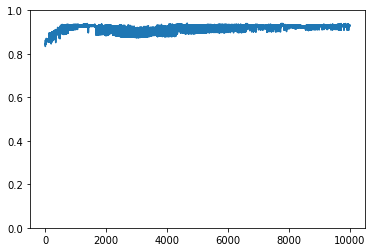

In [40]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.00001)

#Testing the Model

In [43]:
Y_pred_test = perceptron.predict(X_test)
print("The accuracy of the test is ",accuracy_score(Y_pred_test, Y_test)*100,"%")

The accuracy of the test is  92.98245614035088 %
